In [8]:
import pickle
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


pG = pickle.load(open("Music_network_w_genre.p", "rb"))
G = nx.read_gpickle("Music_network_w_genre.p")
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4009
Number of edges: 8098
Average degree:   4.0399


In [167]:
graphs = list(nx.connected_component_subgraphs(G))
lcc = max(graphs, key=len)
num_nodes = lcc.__len__()
num_edges = lcc.size()

3747
7787
3747


# LCC Degree Distribution

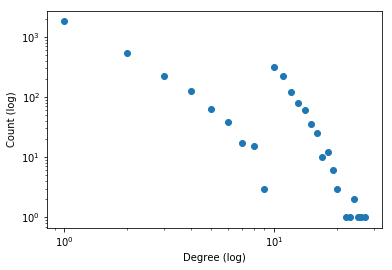

In [147]:
degree = nx.degree(lcc)
counts = {}
for n, d in degree:
    if d in counts:
        counts[d] = counts[d] + 1
    else:
        counts[d] = 1
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log)')
plt.ylabel("Count (log)")
# plt.suptitle('Degree Distribution')
plt.scatter(list(counts.keys()), list(counts.values()))
plt.show()

# LCC Network Structure

In [ ]:
print('Nodes: ' + str(len(lcc.nodes)))
print('Average Clustering: ' + str(nx.average_clustering(lcc)))
print('Diameter: ' + str(nx.diameter(lcc)))
print('Degree Assortativity: ' + str(nx.degree_assortativity_coefficient(lcc)))
print('Average Shortest Path: ' + str(nx.average_shortest_path_length(lcc)))

Nodes: 3747
Average Clustering: 0.196043450118536
Diameter: 22
Degree Assortativity: -0.14485181357066712


# Genre Network Structure

In [185]:
genre_dict = {}
genre_attribute_dict = {}
for n,d in lcc.nodes:
    genre_attribute_dict[(n,d)] = {'genre':d, d:d}
    if d in genre_dict.keys():
        distribution = genre_dict[d]
        distribution.append(lcc.degree((n,d)))
        genre_dict[d] = distribution
    else:
        distribution = list()
        distribution.append(lcc.degree((n,d)))
        genre_dict[d] = distribution
        
interesting_genres = ['Hip-Hop', 'pop', 'electronic', 'indie', 'rock', 'classic rock']

nx.set_node_attributes(lcc, genre_attribute_dict)

def degree_distribution(distribution, genre):
    counts = {}
    for d in distribution:
        if d in counts:
            counts[d] = counts[d] + 1
        else:
            counts[d] = 1
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree (log)')
    plt.ylabel("Count (log)")
    plt.suptitle(genre.capitalize())
    plt.scatter(list(counts.keys()), list(counts.values()))
    plt.show()

In [166]:
for genre in interesting_genres:
    print(genre)
    genre_nodes = list()
    for n in lcc.nodes:
        if lcc.nodes[n]['genre'] == genre:
            genre_nodes.append(n)
    genre_graph = lcc.subgraph(genre_nodes)
    genre_graph_components = nx.connected_component_subgraphs(genre_graph)
    genre_lcc = max(genre_graph_components, key=len)
    
    top_degree = list()
    for n in genre_lcc.nodes:
        top_degree.append([n[0], genre_lcc.degree[n]])

    top_degree.sort(key=lambda x: x[1], reverse=True)

    print('Nodes: ' + str(len(genre_lcc.nodes)))
    print('Average Clustering: ' + str(nx.average_clustering(genre_lcc)))
    print('Diameter: ' + str(nx.diameter(genre_lcc)))
    print('Degree Assortativity: ' + str(nx.degree_assortativity_coefficient(genre_lcc)))
    print('Average Shortest Path: ' + str(nx.average_shortest_path_length(genre_lcc)))
    display(top_degree[:5])
    print()

pop
Nodes: 221
Average Clustering: 0.210476286330055
Diameter: 10
Degree Assortativity: 0.18256494112038824
Average Shortest Path: 4.500904977375566


[['Bebe Rexha', 24],
 ['Ariana Grande', 22],
 ['Selena Gomez', 21],
 ['Hailee Steinfeld', 18],
 ['Christina Aguilera', 17]]


Hip-Hop
Nodes: 253
Average Clustering: 0.2566514637780194
Diameter: 10
Degree Assortativity: 0.10232629996752021
Average Shortest Path: 4.7604303908651735


[['Travi$ Scott', 19],
 ['A$AP Rocky', 19],
 ['Joey Bada', 17],
 ['2 Chainz', 16],
 ['Future', 16]]


electronic
Nodes: 156
Average Clustering: 0.21922834999758076
Diameter: 14
Degree Assortativity: -0.35063604240282675
Average Shortest Path: 6.319437551695616


[['Cut Copy', 14],
 ['The Chemical Brothers', 12],
 ['The Knife', 11],
 ['Louis The Child', 10],
 ['Röyksopp', 10]]


classic rock
Nodes: 110
Average Clustering: 0.27946336491791035
Diameter: 8
Degree Assortativity: -0.14212141812413748
Average Shortest Path: 3.953628023352794


[['Cream', 13],
 ['Chicago', 12],
 ['Eagles', 12],
 ['Boston', 12],
 ['Steve Miller Band', 11]]


rock
Nodes: 111
Average Clustering: 0.21246961246961246
Diameter: 16
Degree Assortativity: -0.16683745113666565
Average Shortest Path: 6.430794430794431


[['Goo Goo Dolls', 10],
 ['Train', 9],
 ['Smash Mouth', 9],
 ['U2', 8],
 ['Third Eye Blind', 8]]


indie
Nodes: 182
Average Clustering: 0.16129386486529335
Diameter: 11
Degree Assortativity: -0.02180766044823983
Average Shortest Path: 5.27861089187056


[['The Shins', 13],
 ['Spoon', 11],
 ['Broken Bells', 11],
 ['Kaiser Chiefs', 10],
 ['Two Door Cinema Club', 10]]


rnb
Nodes: 67
Average Clustering: 0.341942882987659
Diameter: 9
Degree Assortativity: -0.3801849004309281
Average Shortest Path: 3.783355947535052


[['Usher', 12], ['Miguel', 10], ['Ne-Yo', 10], ['TLC', 9], ['Jeremih', 9]]


folk
Nodes: 86
Average Clustering: 0.14674485720997343
Diameter: 11
Degree Assortativity: -0.04487018688072217
Average Shortest Path: 4.659644322845417


[['Gregory Alan Isakov', 15],
 ['The Head and the Heart', 11],
 ['Iron & Wine', 10],
 ['The Paper Kites', 10],
 ['Ben Howard', 10]]


soul
Nodes: 89
Average Clustering: 0.23292518966676265
Diameter: 12
Degree Assortativity: -0.23234682208352242
Average Shortest Path: 5.366445352400409


[['Marvin Gaye', 14],
 ['The Temptations', 13],
 ['The Supremes', 10],
 ['Otis Redding', 10],
 ['Al Green', 10]]


seen live
Nodes: 8
Average Clustering: 0.19166666666666665
Diameter: 4
Degree Assortativity: -0.3207547169811331
Average Shortest Path: 1.8928571428571428


[['Big Thief', 5],
 ['Mitski', 3],
 ['Lucy Dacus', 3],
 ['Courtney Barnett', 3],
 ['Kevin Morby', 2]]

# Average Network Structure for Genres with >50 Nodes

In [183]:
num_nodes = list()
diameter = list()
avg_clustering = list()
degree_assort = list()
shortest_path = list()
for genre in genre_dict.keys():
    genre_nodes = list()
    for n in lcc.nodes:
        if lcc.nodes[n]['genre'] == genre:
            genre_nodes.append(n)
    genre_graph = lcc.subgraph(genre_nodes)
    genre_graph_components = nx.connected_component_subgraphs(genre_graph)
    genre_lcc = max(genre_graph_components, key=len)
    if len(genre_lcc.nodes) > 50:
        num_nodes.append(len(genre_lcc.nodes))
        diameter.append(nx.diameter(genre_lcc))
        avg_clustering.append(nx.average_clustering(genre_lcc))
        degree_assort.append(nx.degree_assortativity_coefficient(genre_lcc))
        shortest_path.append(nx.average_shortest_path_length(genre_lcc))

print("nodes: " + str(sum(num_nodes)/len(num_nodes)))
print('diameter: ' + str(sum(diameter)/len(diameter)))
print('avg cluster: ' + str(sum(avg_clustering)/len(avg_clustering)))
print('degree_assort: ' + str(sum(degree_assort)/len(degree_assort)))
print('shortest_path: ' + str(sum(shortest_path)/len(shortest_path)))

nodes: 135.1
diameter: 11.0
avg cluster: 0.2321864443417753
degree_assort: -0.1488022569038685
shortest_path: 4.916132206417362

